# AIN212 Fall 2023 Project Assignment
Rating prediction on Women's E-Commerce Clothing Reviews dataset.

### Dataset: We will be working on Women's E-Commerce Clothing Reviews dataset from Kaggle.
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

* Authors: Alperen Demirci(2220765010) & Bora Dere(2220765021)
* Course: AIN212 - Data Science
* Emails: alperendemirci@hacettepe.edu.tr & boradere@hacettepe.edu.tr
* Date: 28/12/2023

* Description: This project is about classifying the reviews of the women who bought clothes from an online shopping site. Reviews are rated from 1 to 5, we will classify every entry into that range. We will use the review text and title to predict the rating. We will use the following algorithms: Naive Bayes, Logistic Regression, SVM. We will compare the results of these algorithms and choose the best one.

## Explaining the dataset:
There are 11 columns in this dataset.
- <span style="color: red;">Clothing ID:</span> Integer Categorical variable that refers to the specific piece being reviewed.
- <span style="color: red;">Age:</span> Positive Integer variable of the reviewers age.
- <span style="color: red;">Title:</span> String variable for the title of the review.
- <span style="color: red;">Review Text:</span> String variable for the review body.
- <span style="color: red;">Rating:</span> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- <span style="color: red;">Recommended IND:</span> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- <span style="color: red;">Positive Feedback Count:</span> Positive Integer documenting the number of other customers who found this review positive.
- <span style="color: red;">Division Name:</span> Categorical name of the product high level division.
- <span style="color: red;">Department Name:</span> Categorical name of the product department name.
- <span style="color: red;">Class Name:</span> Categorical name of the product class name.

## Our approach:

* First we need to clean the data. (Remove the null values, remove the unnecessary columns etc.)
* Then we need to visualize the data in order to understand it better.
* After that we will use different classification algorithms to predict the ratings of the reviews.(Naive Bayes, Logistic Regression, SVM etc.)
* We will compare the results of the algorithms and choose the best one.

## Personal Thoughts and Comments:

* Our problem and data are near to SpamClassification problem, we think the fastest and most accurate algorithm will be Naive Bayes.
* Since we are not familiar with deep NLP concepts, we will try to solve this problem using only statistics and essences of data science. In our opinion, this will be challenging but educative for us.
* Our valuable column is based on strings, cleaning the data will be the most challenging part of this project.

## Imports and loading the dataset

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

In [398]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = pd.DataFrame(data)

In [399]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Preprocessing and Cleaning
First, we check the null values for numerical columns, then for categorical columns.

In [400]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


We do not see any anomaly on Age column (i.e. negative values, etc.) so we can continue.
Range column is also fine, it fits into constraints.

* Quick Note: Unnamed column is a poor attempt to create an index column. So, it is redundant.
Also, we will not use the Clothing ID column, so we will drop them both.

In [401]:
df.drop(columns=['Unnamed: 0', 'Clothing ID'], inplace=True)

In [402]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [403]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

As seen, we have 3810 null values in the Title column. In order to solve this problem, we have concataneated the Title and Review Text columns. Then we have dropped the Review Text column.
- Concatanation format is: Title + " " + Review Text
- We did not drop the null values in Review Text columns since customers may just write their reviews into the Title column. (Like Title = "I love it!" and Review Text = null)
- For divison name, department name and class name columns, we have filled the null values with "Unknown" class since we do not have any information on which class they belong to.

In [404]:
# Code for title and review concatanation and removing null values
df['Review Text'] = df['Review Text'].fillna('')
df['Title'] = df['Title'].fillna('')
df['Review'] = df['Title'] + ' ' + df['Review Text']
df.drop(columns=['Title', 'Review Text'], inplace=True)
df.shape

(23486, 8)

In [405]:
# Code for removing empty reviews
empty_reviews = df['Review'].apply(lambda x: x.isspace())
df = df[~empty_reviews]
df.shape

(22642, 8)

In [406]:
df['Division Name'] = df['Division Name'].fillna("Unknown")
df['Department Name'] = df['Department Name'].fillna("Unknown")
df['Class Name'] = df['Class Name'].fillna("Unknown")

* What about the null values in the Review Text column? We have dropped them after the concatanation due to lack of information. We cannot generate fake reviews :)

In [407]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


Let's check for the null values again.

In [408]:
df.isnull().sum()

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [409]:
df.shape

(22642, 8)

Since we have 0 null values, we can continue.

## Feature Visualization

We will plot distributions of the data in order to understand it better.

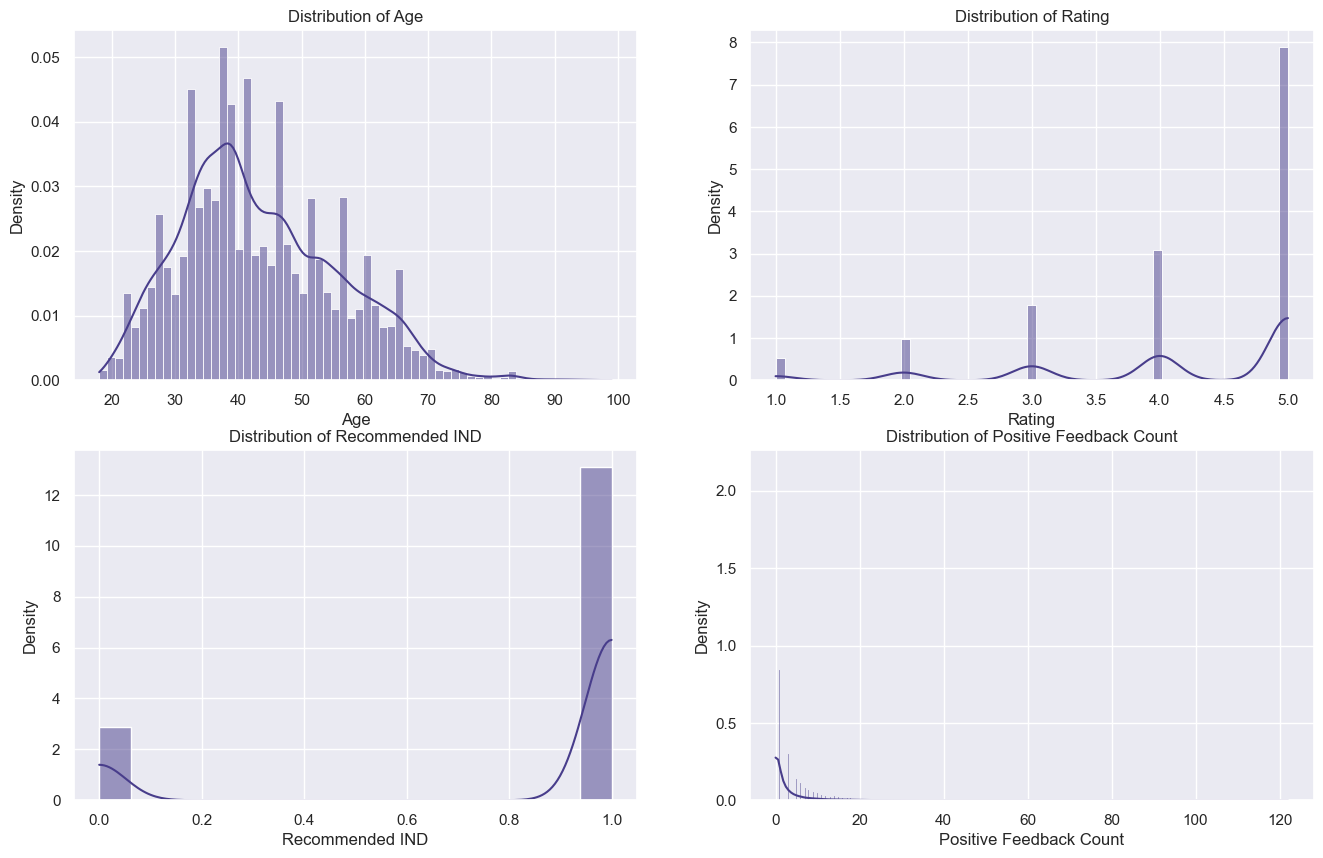

In [410]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes('number').columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, color='darkslateblue', kde=True, stat='density')
    plt.title(f'Distribution of {col}')

- We see that Age column is noisy but it is similar to normal distribution. That's a good sign because we do not need to apply any transformation on it.
- There are some outliers in the Age column and we will handle them using imputation.
- We see that Rating column is imbalanced. Now there is a class imbalance problem we need to solve.

Finding and handling outliers in Age column.

In [411]:
## Using IQR to find outliers in Age column
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

upper_limit = df['Age'].quantile(0.75) + 1.5*IQR
lower_limit = df['Age'].quantile(0.25) - 1.5*IQR

print(f"Number of outliers: {len(df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)])}")
print(f"Median value: {df['Age'].median()}")
print(f"Mean value: {df['Age'].mean()}")
print(f"Variance of Age column: {df['Age'].var()}")
print(f"Upper bound for the IQR: {upper_limit}")
print(f"Lower bound for the IQR: {lower_limit}")

Number of outliers: 108
Median value: 41.0
Mean value: 43.27978977122162
Variance of Age column: 151.95550248660885
Upper bound for the IQR: 79.0
Lower bound for the IQR: 7.0


In [412]:
df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]['Age'].unique()

array([83, 80, 93, 82, 85, 84, 89, 81, 90, 94, 86, 99, 91, 87, 92])

Now, considering the bounds and unique values of outliers; outliers lay on the upper half of the IQR.

* We have fixed the outliers age to 80 since it is the upper bound of the IQR.

That's because we think that we won't lose much information applying a such trim. The main reason is that since it's an online shopping dataset, we do not expect to see a lot of customers over 80 years old.The number 99 is suspicious too.

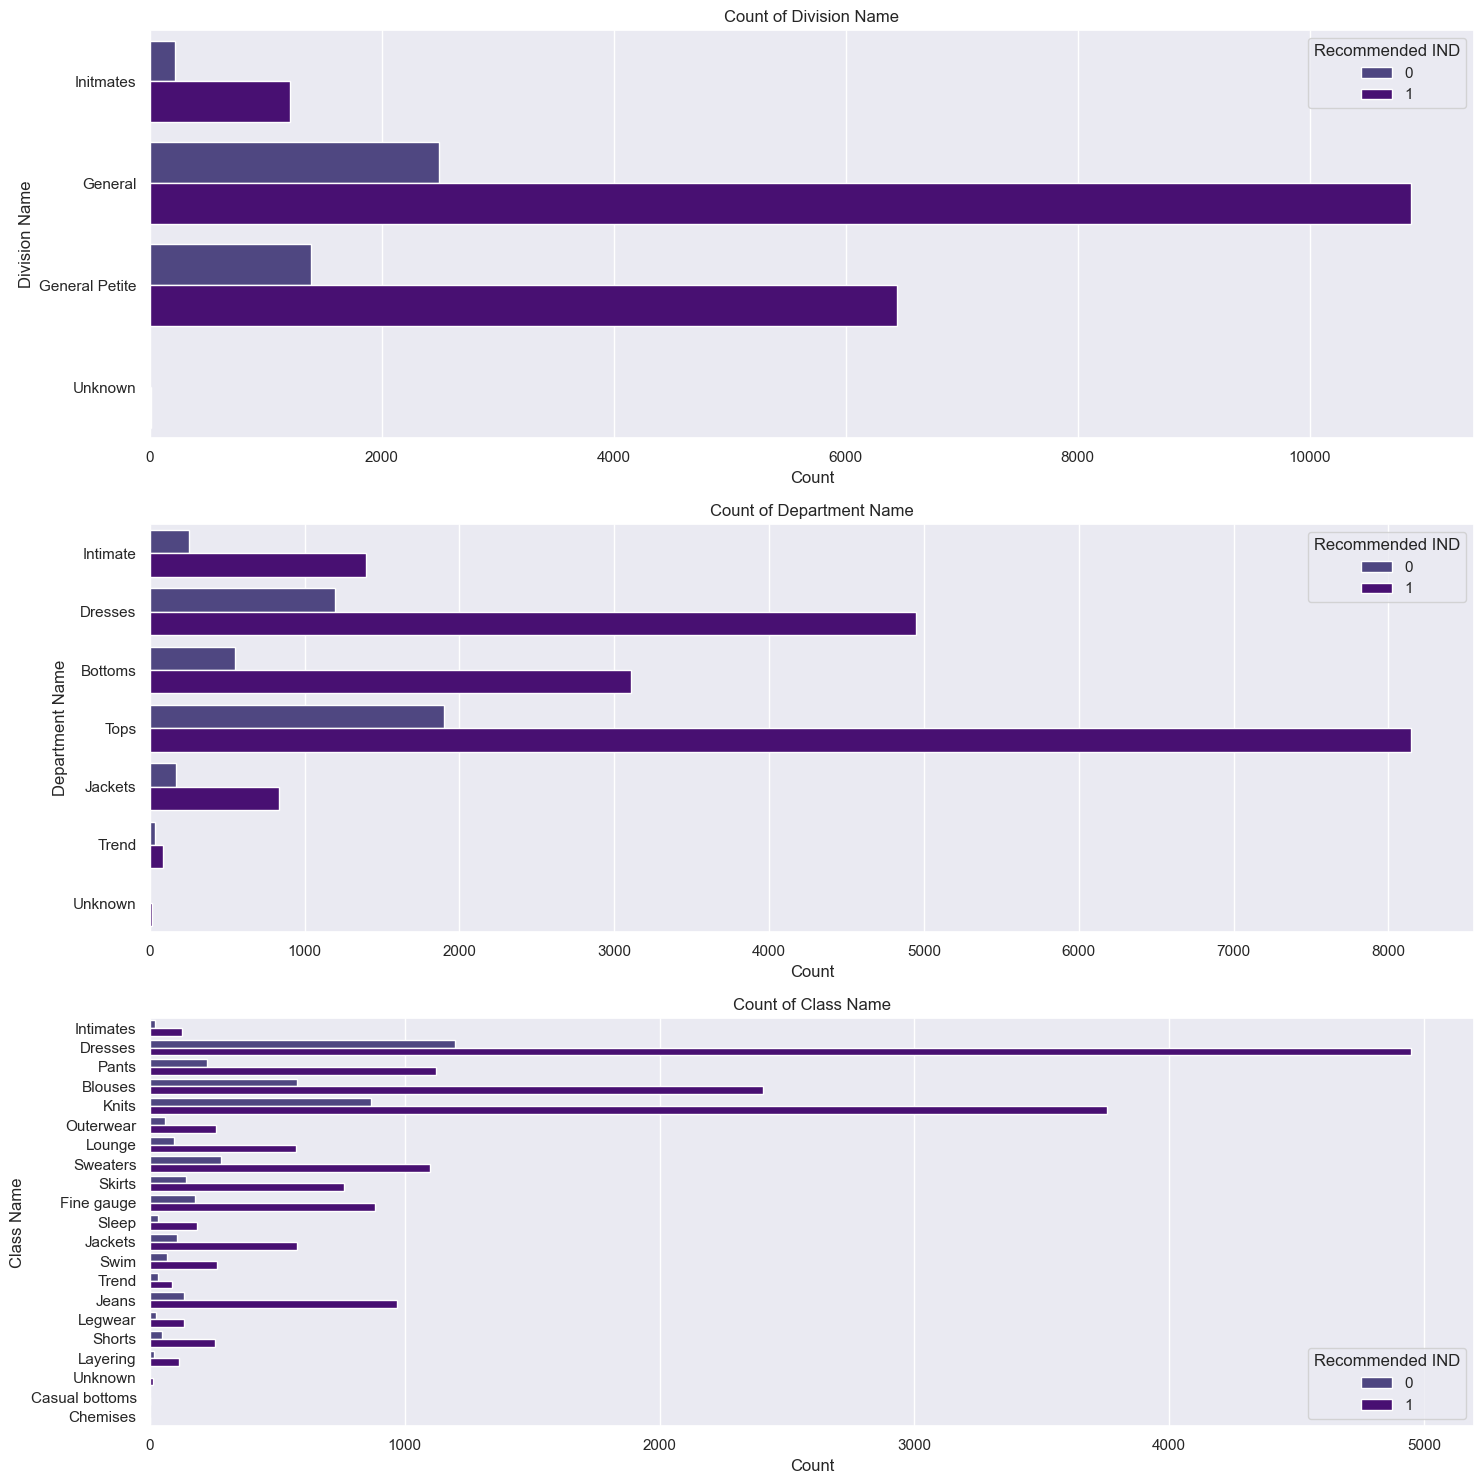

In [413]:
plt.figure(figsize=(15, 15))

cat_cols = ['Division Name', 'Department Name', 'Class Name']

for i, col in enumerate(cat_cols):
    plt.subplot(3, 1, i+1)
    sns.countplot(data=df, y=col, palette=['darkslateblue', 'indigo'], hue='Recommended IND')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')

plt.tight_layout()

There are some rare categories in the Class Name column (Casual bottoms, Chemises). Also in the Department Name column (Trend).
- We may drop them since they are not too much.

We will check the number of entries in these classes and decide if we should drop them.

In [414]:
df['Class Name'].value_counts()

Class Name
Dresses           6146
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Unknown             13
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

Since there are only 1 entries in Casual Bottoms class and 1 entry in Chemises class, we will drop them.

In [415]:
# Code for removing classes with 'Casual bottoms' or 'Chemises'
classes_to_remove = ['Casual bottoms', 'Chemises']
df = df[~df['Class Name'].isin(classes_to_remove)]

In [416]:
df['Class Name'].value_counts()

Class Name
Dresses       6146
Knits         4626
Blouses       2983
Sweaters      1380
Pants         1350
Jeans         1104
Fine gauge    1059
Skirts         903
Jackets        683
Lounge         669
Swim           332
Outerwear      319
Shorts         304
Sleep          214
Legwear        158
Intimates      147
Layering       132
Trend          118
Unknown         13
Name: count, dtype: int64

### Result of the data preprocessing
* We have dropped nearly %3.6 of the data due to emptiness. (null reviews)
* We have dropped unnecessary columns since they are not useful for us.
* We have trimmed the outliers in Age column by fixing the max to 80(upper bound for IQR).
* We have dropped the rare classes in Class Name column.

We have one more problem to solve and it is class imbalance problem. We will solve it when we are training the models.

## Feature Engineering

* We will check for the unique values of the columns in order to understand the data better.

In [417]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Age: 77
Rating: 5
Recommended IND: 2
Positive Feedback Count: 82
Division Name: 4
Department Name: 7
Class Name: 19
Review: 22635


* Recommended IND column takes only 2 values, so it is a binary column.

* Since Class Name, Department Name and Division Name columns are categorical, we will use One Hot Encoding for them. One Hot encoding because we do not want to give them any order!

* Rating column is already ordinal, so we will not touch it.

* Other columns do not seem to have any problem.

In [418]:
# Code for One Hot Encoding of division, department and class columns

df = pd.get_dummies(df,columns=['Division Name','Department Name','Class Name'],drop_first=True)

In [419]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Age: int64
Rating: int64
Recommended IND: int64
Positive Feedback Count: int64
Review: object
Division Name_General Petite: bool
Division Name_Initmates: bool
Division Name_Unknown: bool
Department Name_Dresses: bool
Department Name_Intimate: bool
Department Name_Jackets: bool
Department Name_Tops: bool
Department Name_Trend: bool
Department Name_Unknown: bool
Class Name_Dresses: bool
Class Name_Fine gauge: bool
Class Name_Intimates: bool
Class Name_Jackets: bool
Class Name_Jeans: bool
Class Name_Knits: bool
Class Name_Layering: bool
Class Name_Legwear: bool
Class Name_Lounge: bool
Class Name_Outerwear: bool
Class Name_Pants: bool
Class Name_Shorts: bool
Class Name_Skirts: bool
Class Name_Sleep: bool
Class Name_Sweaters: bool
Class Name_Swim: bool
Class Name_Trend: bool
Class Name_Unknown: bool


In [420]:
df.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Review',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Division Name_Unknown', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Department Name_Unknown', 'Class Name_Dresses',
       'Class Name_Fine gauge', 'Class Name_Intimates', 'Class Name_Jackets',
       'Class Name_Jeans', 'Class Name_Knits', 'Class Name_Layering',
       'Class Name_Legwear', 'Class Name_Lounge', 'Class Name_Outerwear',
       'Class Name_Pants', 'Class Name_Shorts', 'Class Name_Skirts',
       'Class Name_Sleep', 'Class Name_Sweaters', 'Class Name_Swim',
       'Class Name_Trend', 'Class Name_Unknown'],
      dtype='object')

### How to use the Review column?
1. We can use it as it is? No, because it is a string and we need to convert it to numerical values.
2. We can use it as it is and use a model that can handle strings? No, because we do not have enough computational power to do that.

### Here is our solution:

* We can count the number of words in the review. There may be a correlation between the number of words and the rating. We will check it later.

* We can extract the mean of the words used. People who use more complex words may give higher or lower ratings. We will check it later.

* We can compute the sentiment of the review. There may be a correlation between the sentiment and the rating. We will check it later.

Let's start with the first one.

In [421]:
df['num_of_words'] = df['Review'].apply(lambda x: len(x.split()))

Now the second one.

In [422]:
df['mean_word_length'] = df['Review'].apply(lambda x: np.mean([len(word) for word in x.split()]))

Lastly third one.

* For this we'll use nltk library.
* There is a SentimentIntensityAnalyzer class in this package. We will use it to compute the sentiment of the reviews.

* This class gives us 3 values: negative, neutral and positive. We will use them as features.

Lets see and example.

In [423]:

# Use this code when running for the first time

# import nltk
# nltk.download() ## Downloading necessary packages for text preprocessing


In [424]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "Too big/so soft,I should have exchanged it for a smaller size, but i wanted to wear it, so my mistake. i tend to wear size 12-14, and the large is entirely too big. it also had piling right out of the bag. but it is just so soft that i tore the tag off and wore it anyway. if you get this, size down for sure."
sentiment_score = analyzer.polarity_scores(sentence)
sentiment_score

{'neg': 0.053, 'neu': 0.903, 'pos': 0.044, 'compound': -0.145}

The review : "Too big/so soft,I should have exchanged it for a smaller size, but i wanted to wear it, so my mistake. i tend to wear size 12-14, and the large is entirely too big. it also had piling right out of the bag. but it is just so soft that i tore the tag off and wore it anyway. if you get this, size down for sure."

You can see that the problem is indeed in the customer. But it's a bad review. As you can see the compound value is -0.0145 which is negative but not intensely. So we can say that this review is near to neutral since neu = 0.903.

* Let's implement this to our dataset.

In [425]:
df['positive_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['negative_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

In [426]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Dresses,Department Name_Intimate,...,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_Unknown,num_of_words,mean_word_length,positive_sentiment,negative_sentiment,neutral_sentiment
0,33,4,1,0,Absolutely wonderful - silky and sexy and com...,False,True,False,False,True,...,False,False,False,False,False,8,5.750000,0.728,0.000,0.272
1,34,5,1,4,Love this dress! it's sooo pretty. i happen...,False,False,False,True,False,...,False,False,False,False,False,62,3.822581,0.336,0.000,0.664
2,60,3,0,0,Some major design flaws I had such high hopes ...,False,False,False,True,False,...,False,False,False,False,False,102,4.147059,0.174,0.026,0.800
3,50,5,1,0,"My favorite buy! I love, love, love this jumps...",True,False,False,False,False,...,False,False,False,False,False,25,4.680000,0.445,0.200,0.355
4,47,5,1,6,Flattering shirt This shirt is very flattering...,False,False,False,False,False,...,False,False,False,False,False,38,4.526316,0.327,0.000,0.673


Let's check the correlation between our new columns and the rating.

[]

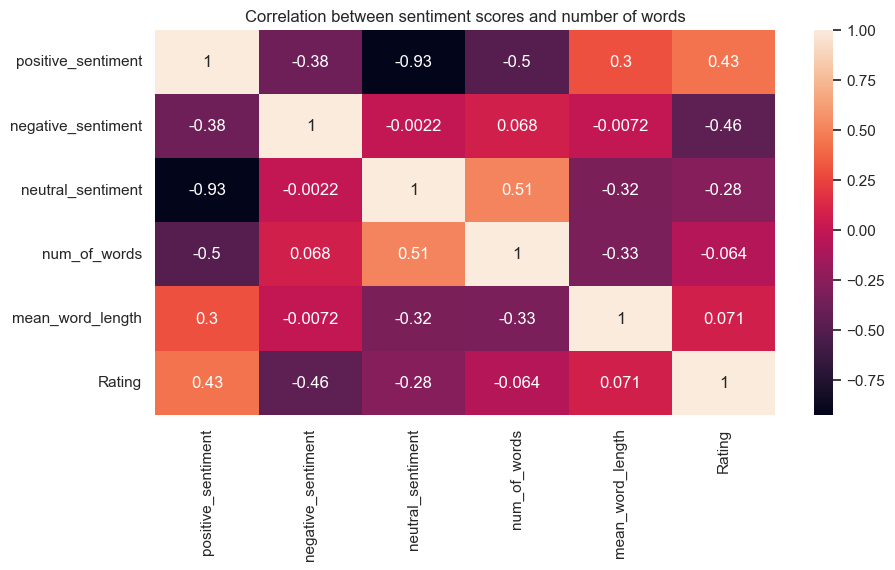

In [427]:
l1 = ['positive_sentiment','negative_sentiment','neutral_sentiment','num_of_words','mean_word_length','Rating']
plt.figure(figsize=(10,5))
plt.title("Correlation between sentiment scores and number of words")
sns.heatmap(df[l1].corr(),annot=True)
plt.plot()

* As seen there is a high correleation between the number of words and the sentiment. We will use this feature.
* Also there is a high correlation (0.5) between the number of words and the neutral sentiment. We will use this feature too.
* mean_of_words and positive sentiment have a high correlation (0.3) too. We will use this feature too.


In [428]:
df.drop('Review',inplace=True,axis=1)

In [429]:
print("Columns : ",df.columns)
print("Number of columns : ",len(df.columns))

Columns :  Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Division Name_Unknown', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Department Name_Unknown', 'Class Name_Dresses',
       'Class Name_Fine gauge', 'Class Name_Intimates', 'Class Name_Jackets',
       'Class Name_Jeans', 'Class Name_Knits', 'Class Name_Layering',
       'Class Name_Legwear', 'Class Name_Lounge', 'Class Name_Outerwear',
       'Class Name_Pants', 'Class Name_Shorts', 'Class Name_Skirts',
       'Class Name_Sleep', 'Class Name_Sweaters', 'Class Name_Swim',
       'Class Name_Trend', 'Class Name_Unknown', 'num_of_words',
       'mean_word_length', 'positive_sentiment', 'negative_sentiment',
       'neutral_sentiment'],
      dtype='object')
Number of columns :  36


### Result of the feature engineering
* We have converted the binary columns to 0 and 1.
* We have used One Hot Encoding for the categorical columns.
* We have added 5 new features to our dataset.
* We have dropped the Review column since we have extracted the features from it.

We have completed the feature engineering part. Now we can continue with the Data Exploration.

## Normalization

* We need to normalize the columns because we don't want to give more importance to a column just because it has higher values.
* We will use Standart Scaler for this which standardize the data around the N(0,1).

In [430]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()




,Age,Rating,Recommended IND,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,...,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_Unknown,num_of_words,mean_word_length,positive_sentiment,negative_sentiment,neutral_sentiment
0,-0.834025,-0.164561,0.470329,-0.454655,-0.727612,3.858461,-0.023969,-0.610426,3.564351,-0.215192,...,-0.097686,-0.254776,-0.121994,-0.072383,-0.023969,-1.894251,3.890608,3.682099,-0.737487,-3.673954
1,-0.752900,0.731677,0.470329,0.236652,-0.727612,-0.259171,-0.023969,1.638199,-0.280556,-0.215192,...,-0.097686,-0.254776,-0.121994,-0.072383,-0.023969,-0.037923,-1.065295,0.632340,-0.737487,-0.380798
2,1.356340,-1.060800,-2.126171,-0.454655,-0.727612,-0.259171,-0.023969,1.638199,-0.280556,-0.215192,...,-0.097686,-0.254776,-0.121994,-0.072383,-0.023969,1.337134,-0.230976,-0.628020,-0.204076,0.761726
3,0.545094,0.731677,0.470329,-0.454655,1.374358,-0.259171,-0.023969,-0.610426,-0.280556,-0.215192,...,-0.097686,-0.254776,-0.121994,-0.072383,-0.023969,-1.309852,1.139356,1.480360,3.365681,-2.976678
4,0.301720,0.731677,0.470329,0.582306,-0.727612,-0.259171,-0.023969,-0.610426,-0.280556,-0.215192,...,-0.097686,-0.254776,-0.121994,-0.072383,-0.023969,-0.862958,0.744193,0.562320,-0.737487,-0.305190


## Data Exploration

* Since we have finished Data Preprocessing and Feature Engineering, we can start exploring the data.
* We will first check the correlation between the features and the rating.

<Axes: >

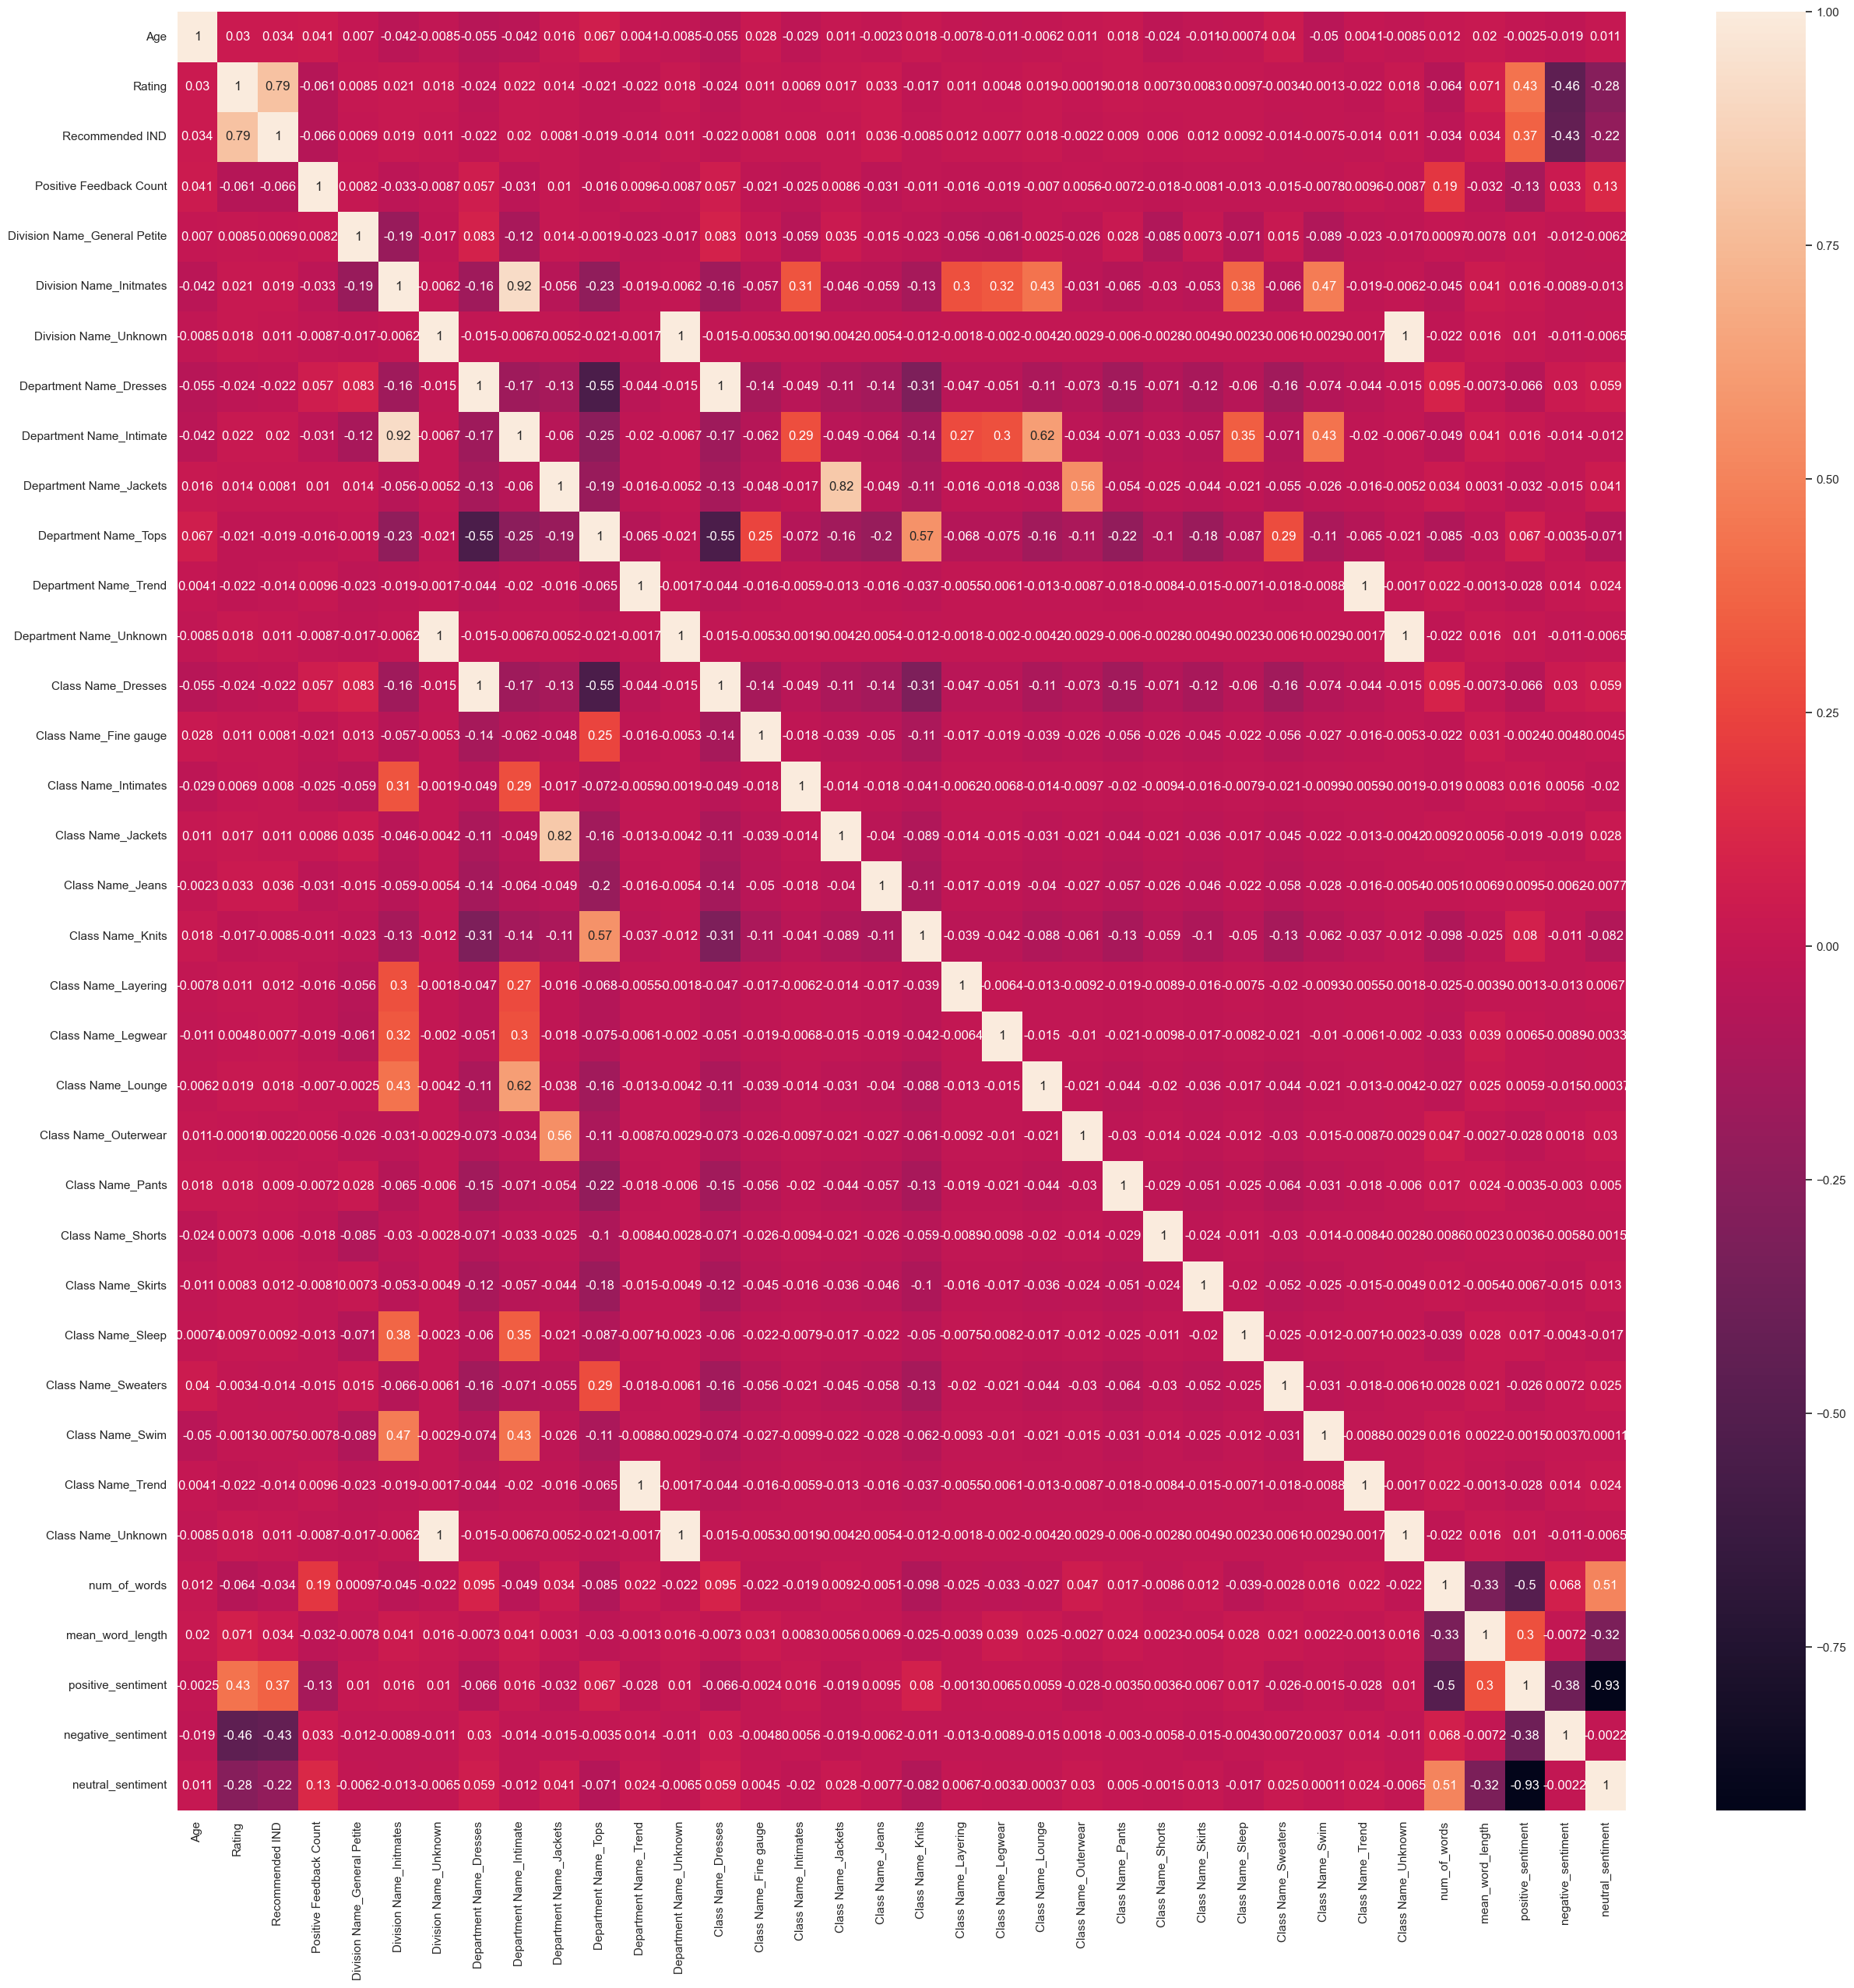

In [431]:
## Checking the correleation between the features and the target variable

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

Comments about the correlation matrix:
* We see that the Recommend IND and the sentiment have a high correlation with the rating.
* Categorical columns have low correlation with the rating. That's because we have used One Hot Encoding for them.
* We may need to drop some columns since they have low correlation with the rating. We will use *Feature Elemination* to decide which columns to drop.

<span style="color: red;">Bu plotları grid haline getiremedim :(</span>

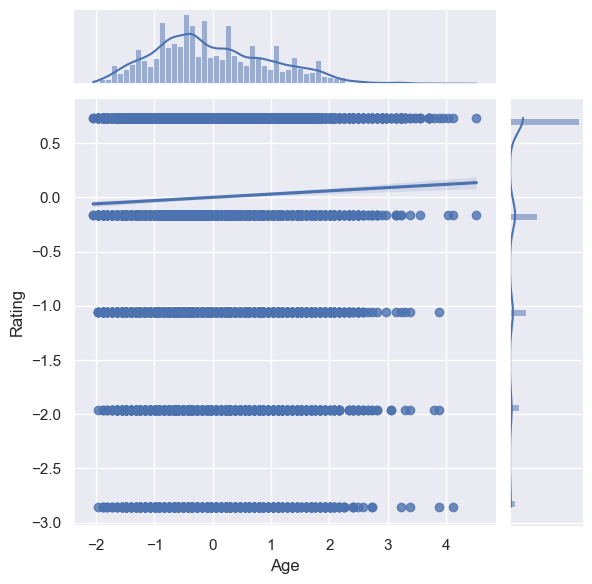

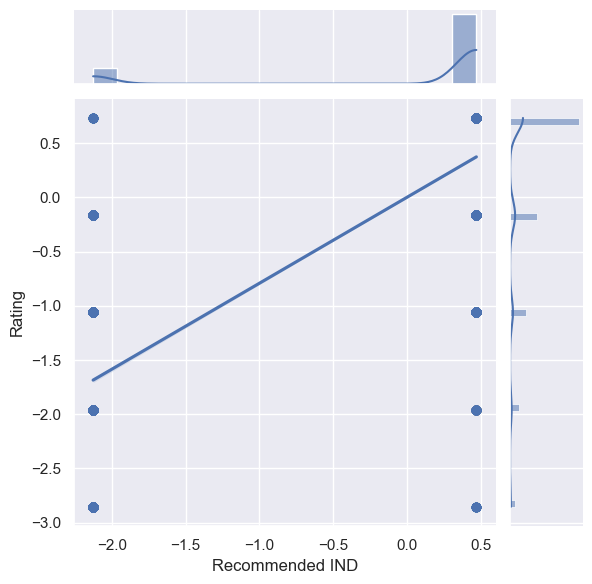

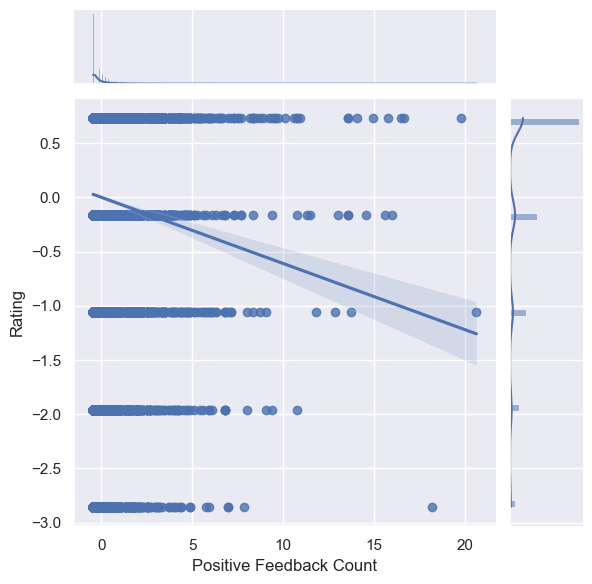

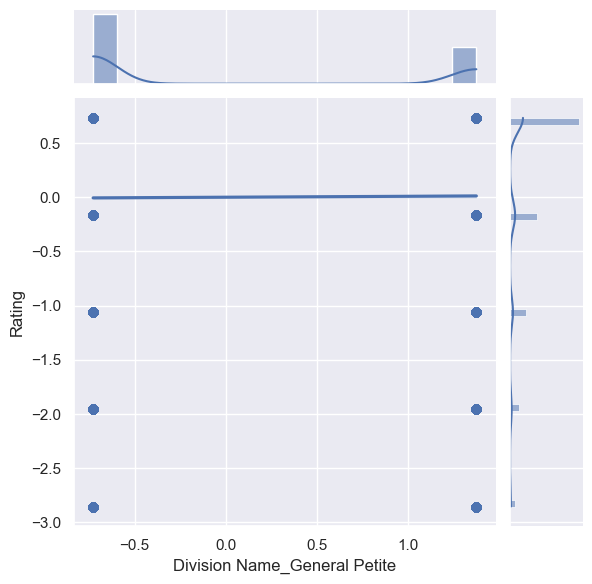

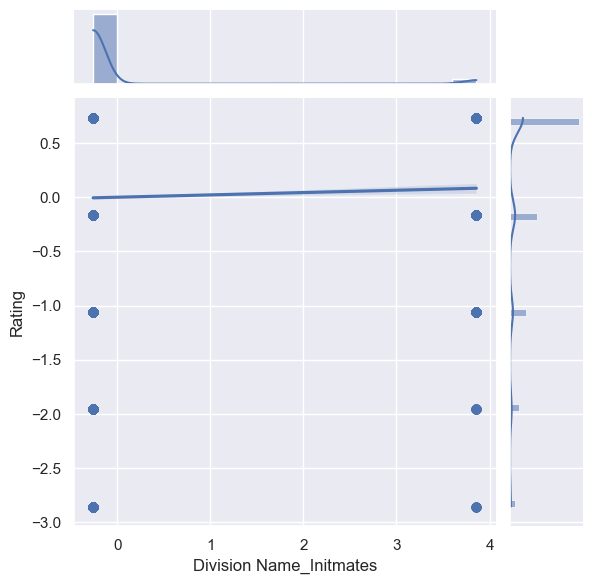

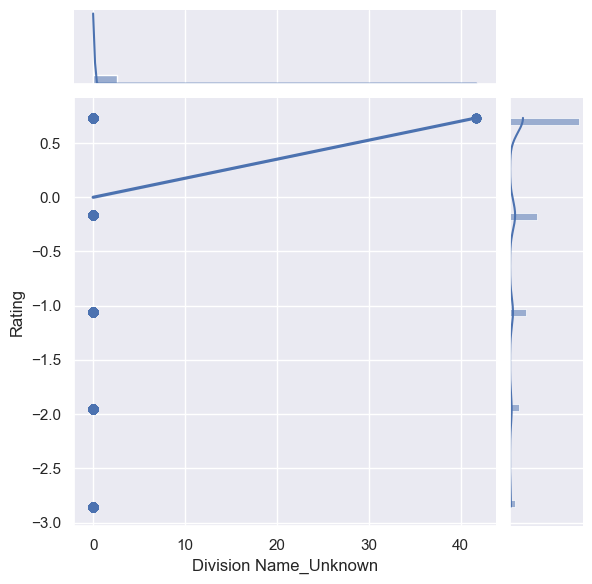

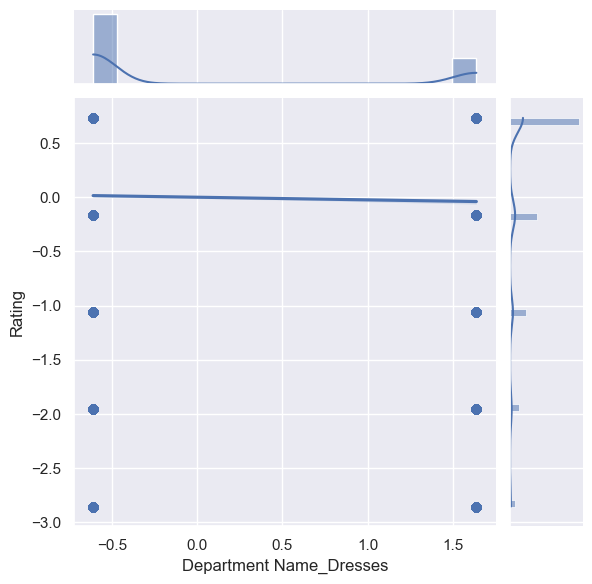

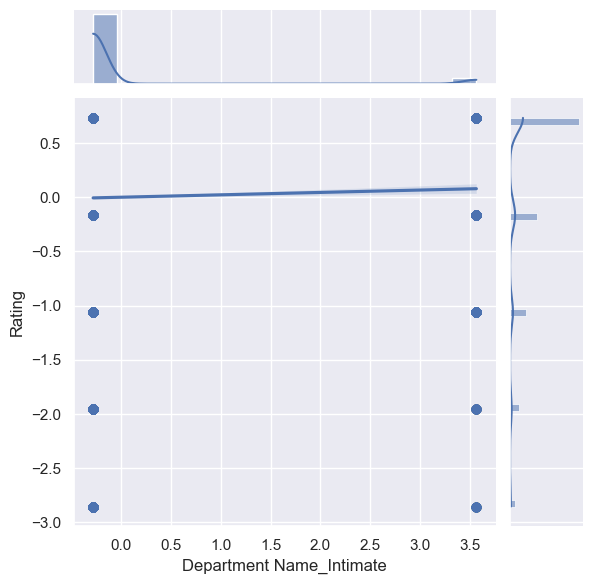

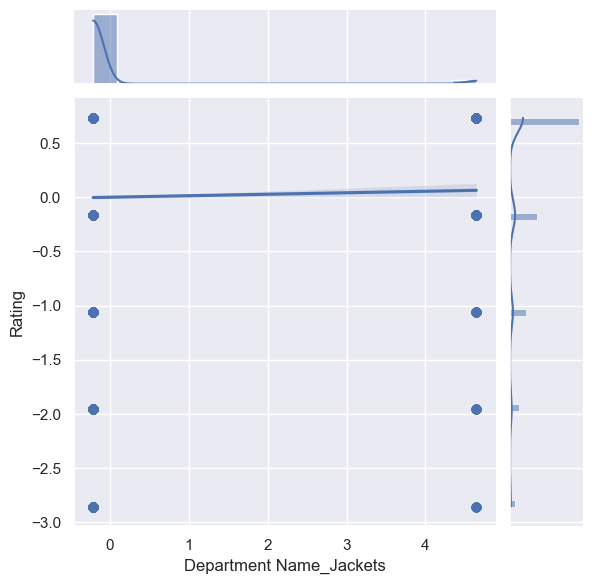

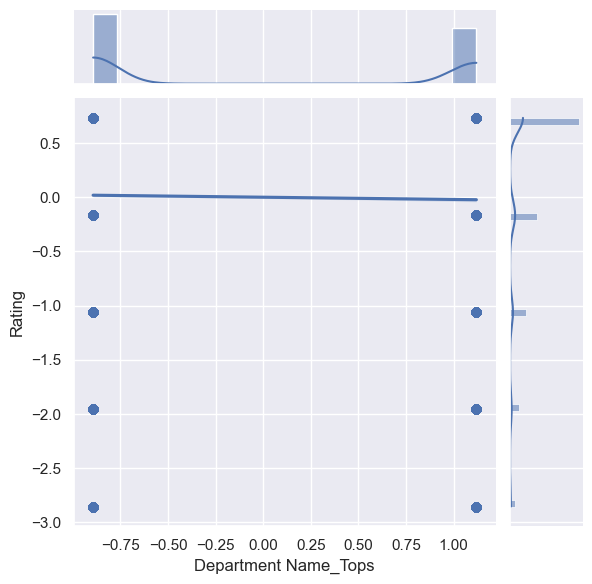

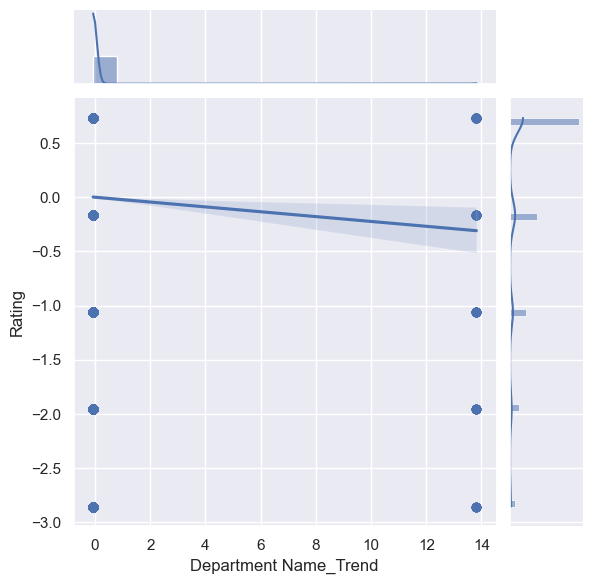

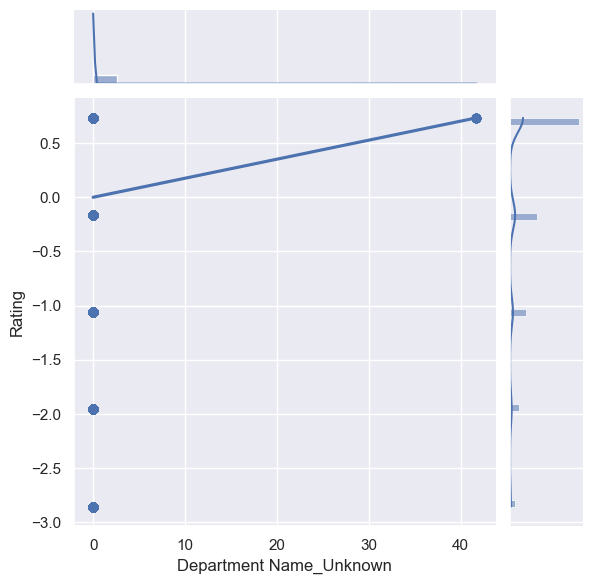

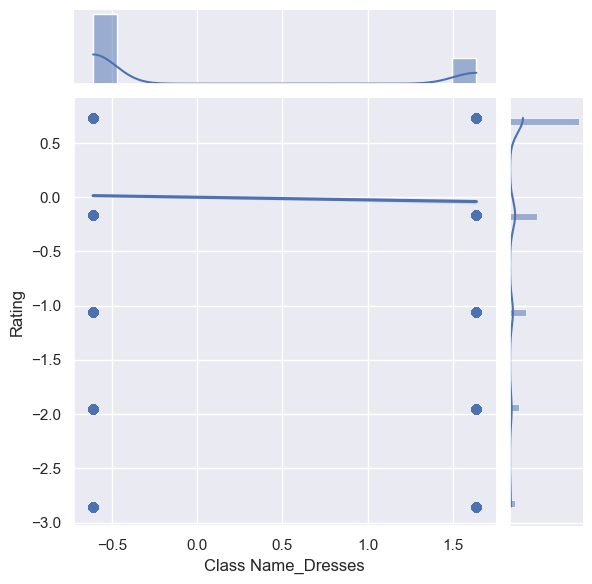

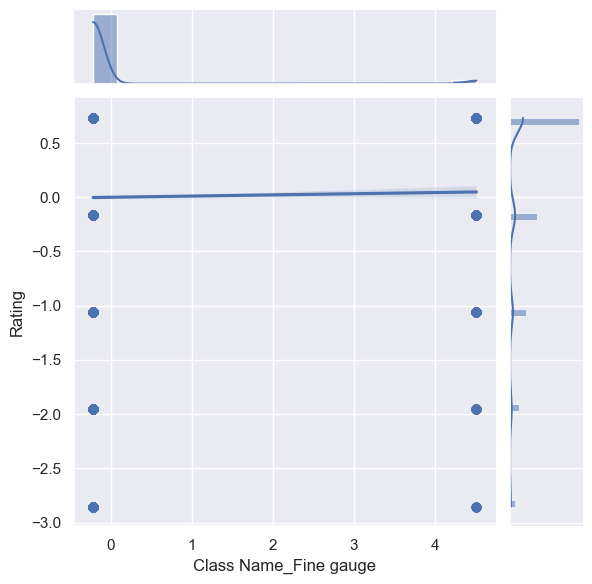

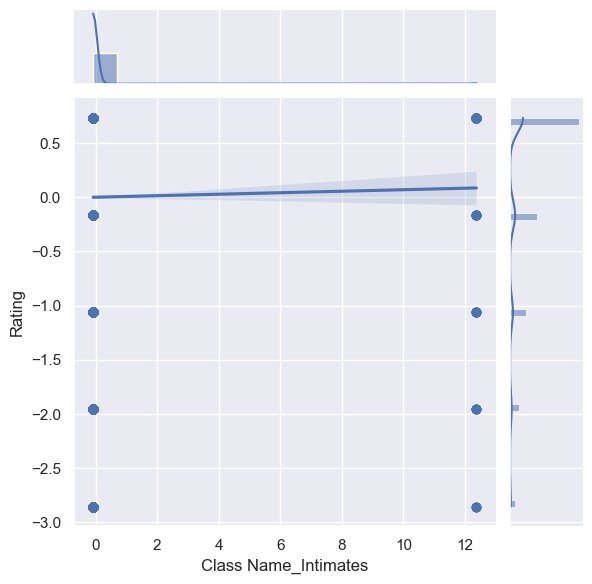

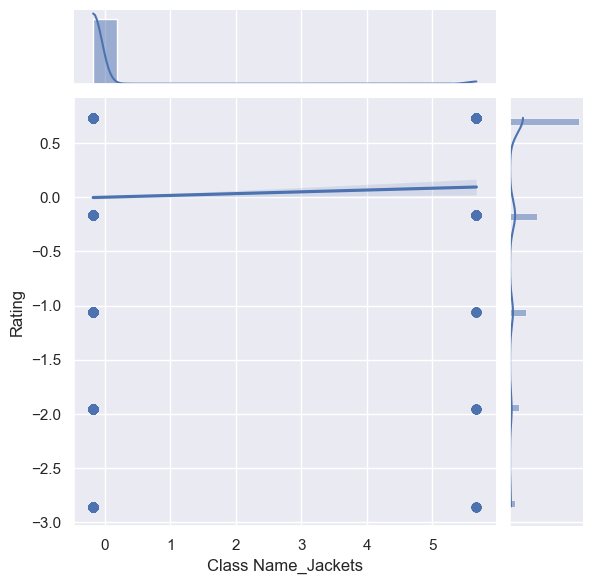

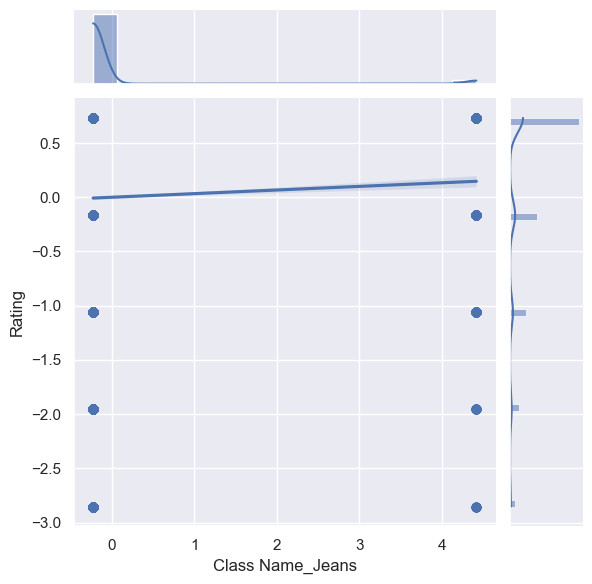

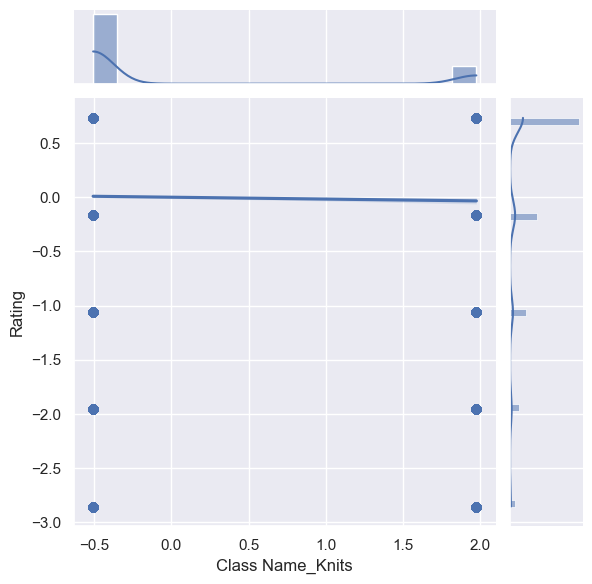

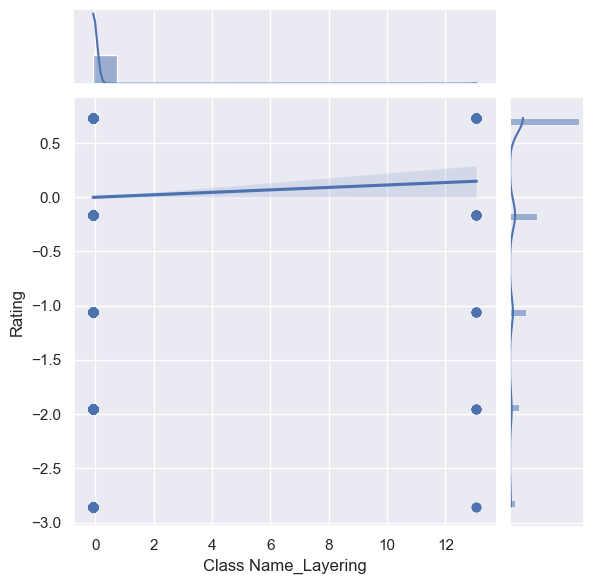

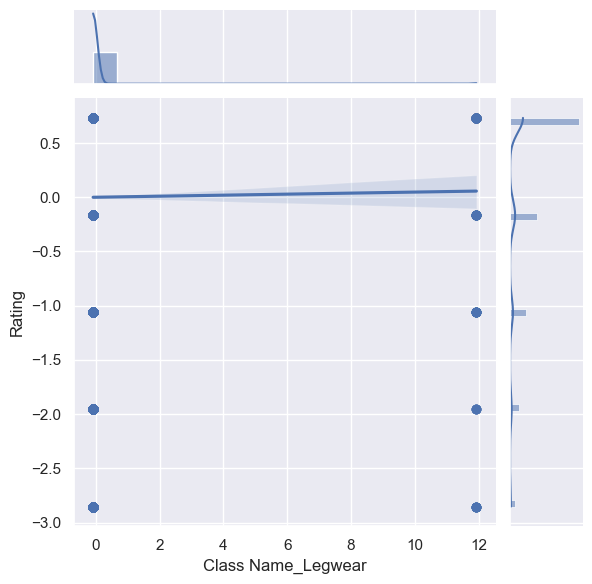

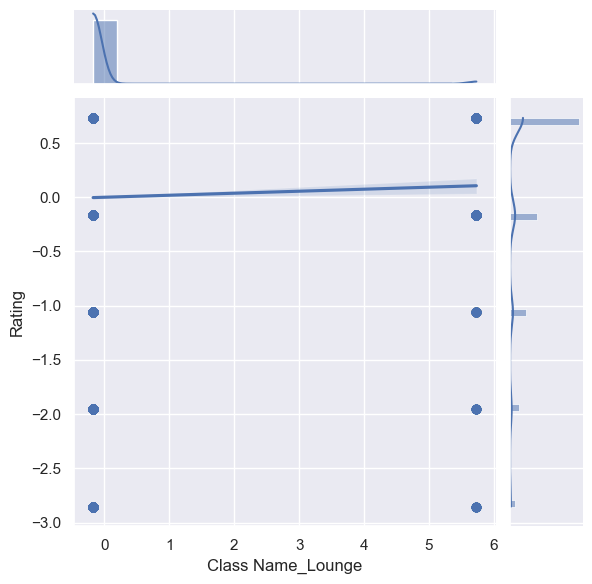

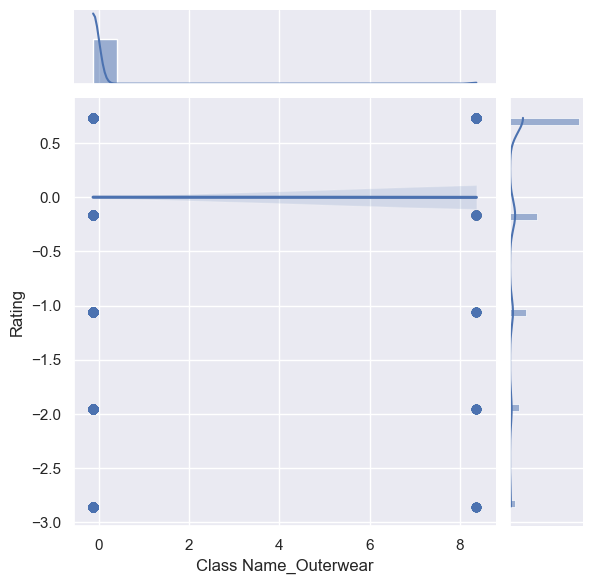

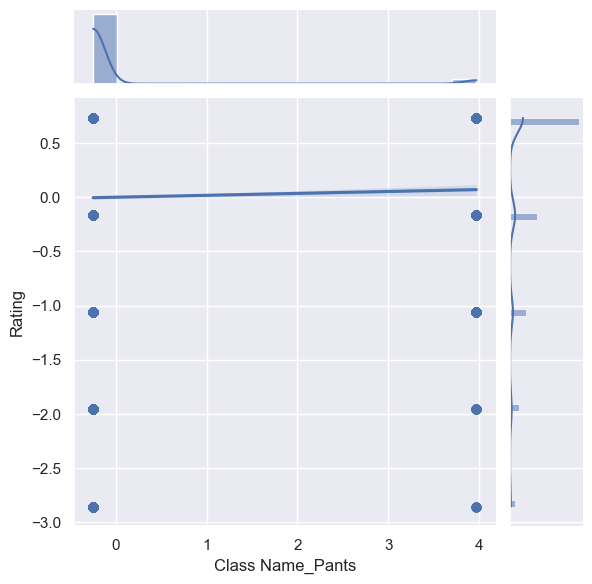

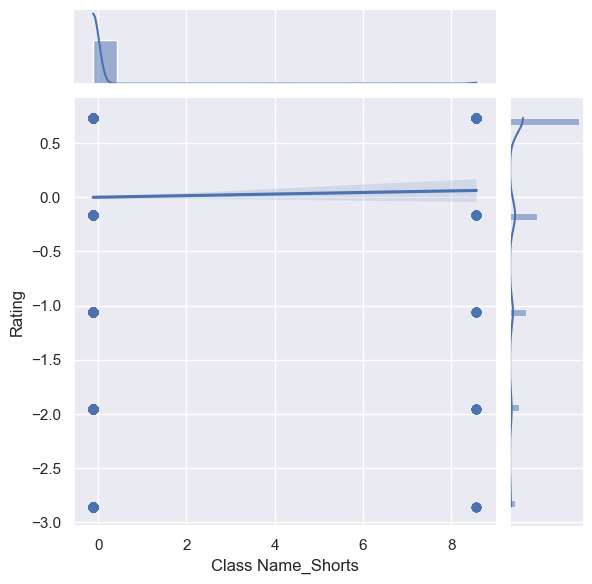

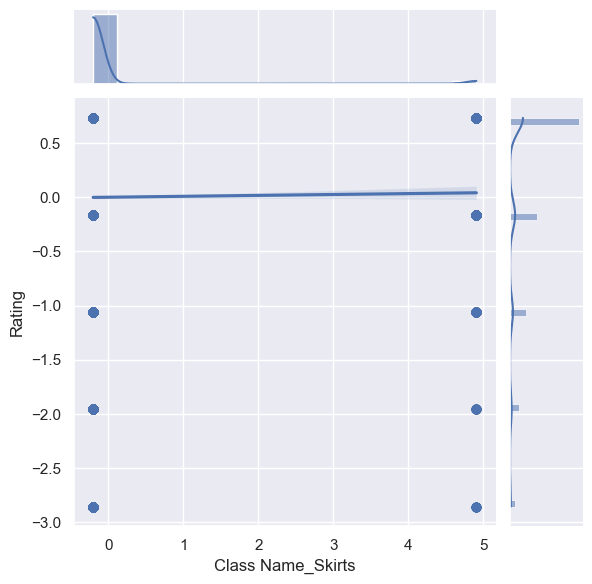

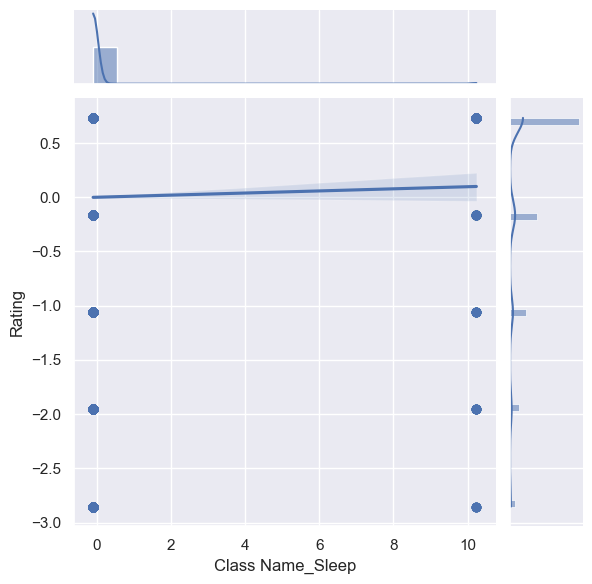

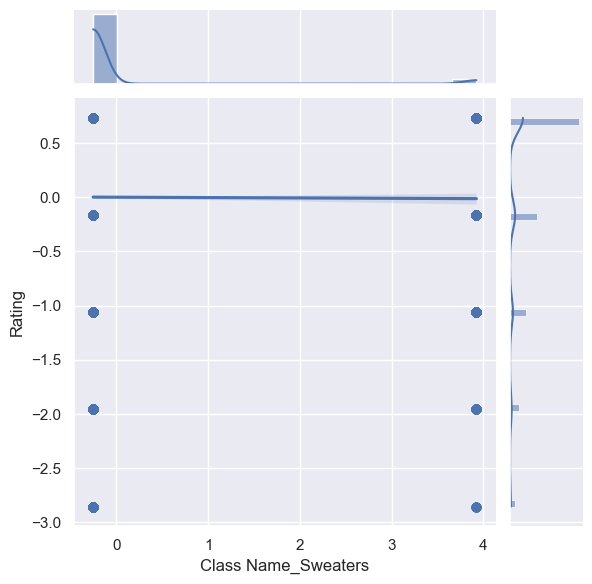

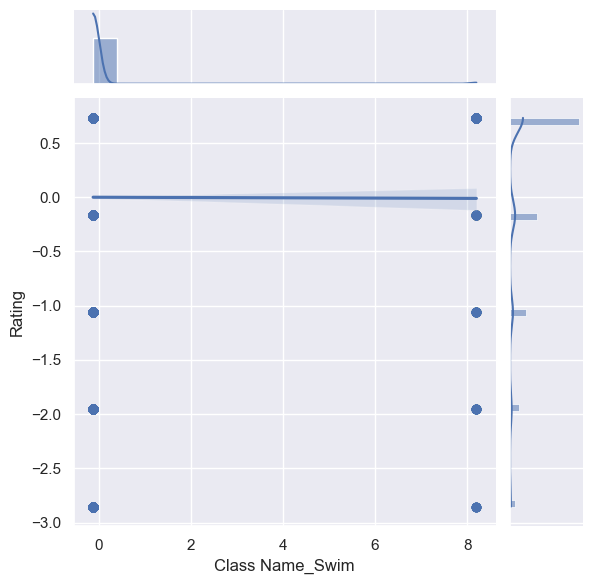

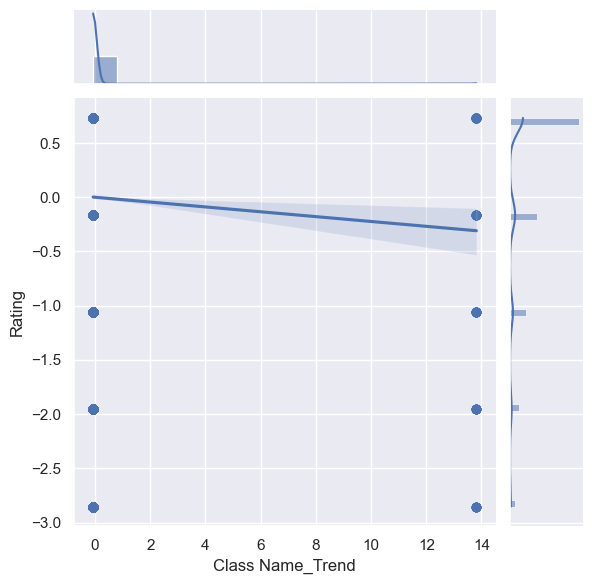

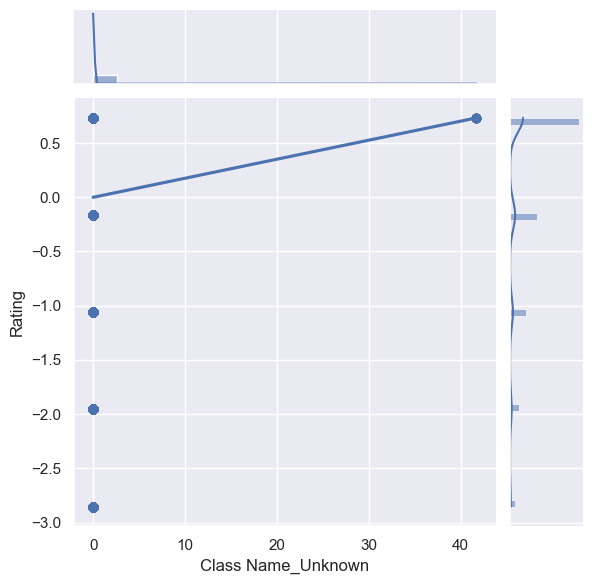

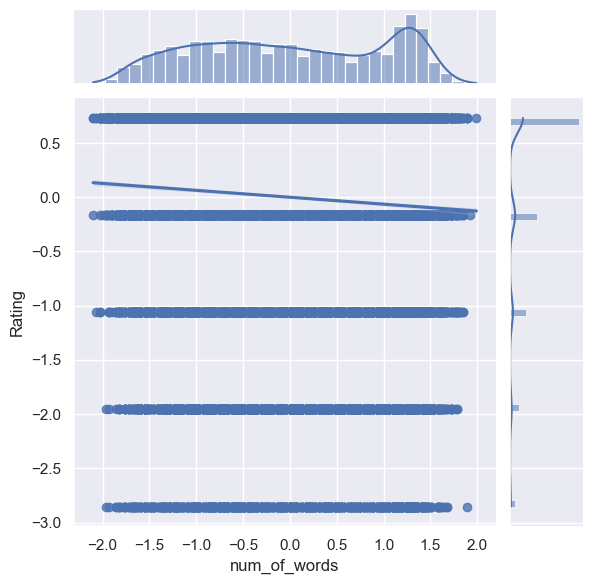

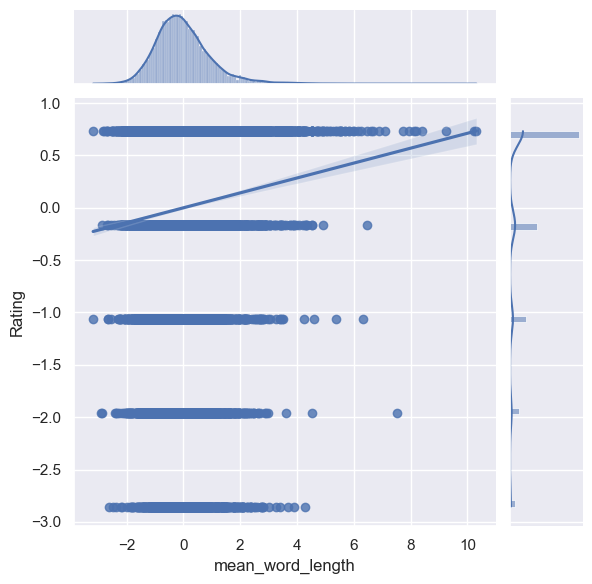

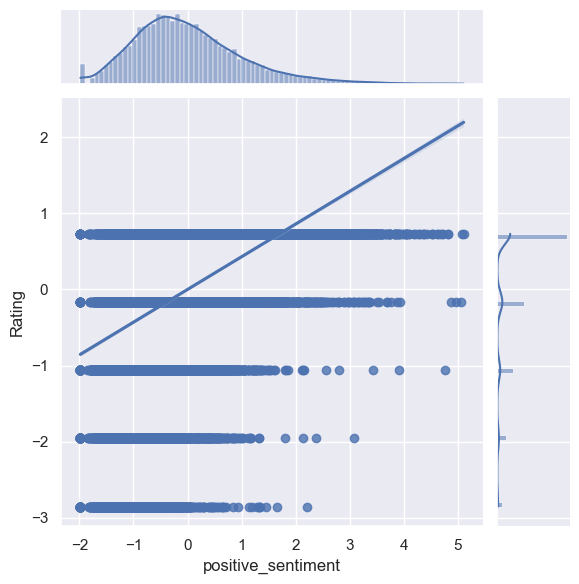

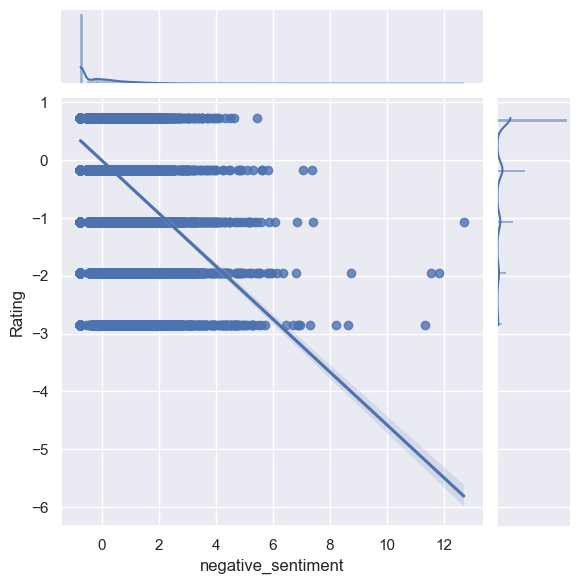

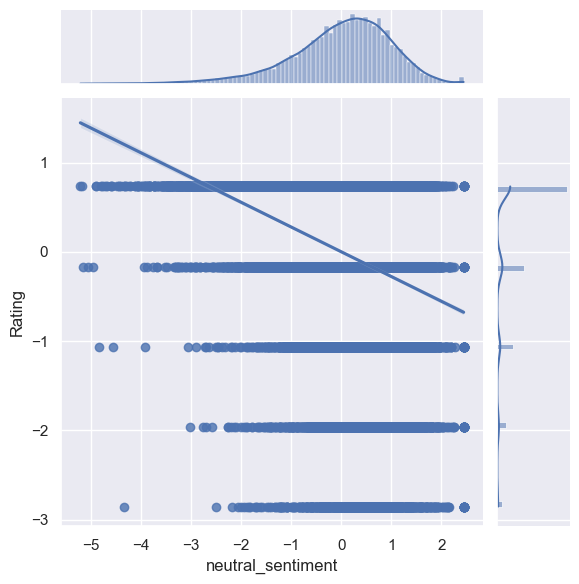

In [432]:
for ele in df.columns:
    if ele!="Rating":
        sns.jointplot(x=ele,y="Rating",data=df,kind="reg")
        plt.show()

* When checked, you can see that there are lots of redundant columns. We will use *Feature Elemination* to drop them.

* The reason that they are redundant is their correlation with the rating.
They have low correlation with the rating.
We can check it by looking at the regression plot of the rating and the column.

* Lets' check if we have any clusters in our data.


Since we have 5 classes, we will use PCA to reduce the dimensionality to 2.


We have scaled the data before applying PCA.

In [433]:
## PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df)

pca.explained_variance_ratio_

array([0.08987591, 0.08426729])

* Explained variance ratio is too low for the first 2 components. It will be hard to visualize the data.

<Axes: xlabel='PCA1', ylabel='PCA2'>

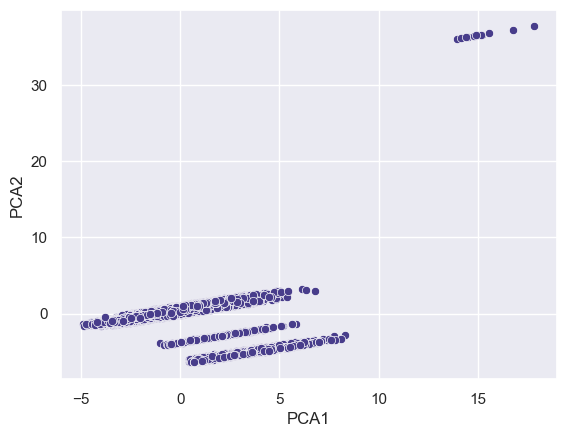

In [434]:
PCA_df = pd.DataFrame(pca.transform(df),columns=['PCA1','PCA2'])

sns.scatterplot(data=PCA_df,x='PCA1',y='PCA2',color='darkslateblue')

* Even if our PCA has explained a low percentage of our variance, we can cluster the data into 4 groups based on PCA.

* Let's try it with KMeans too.

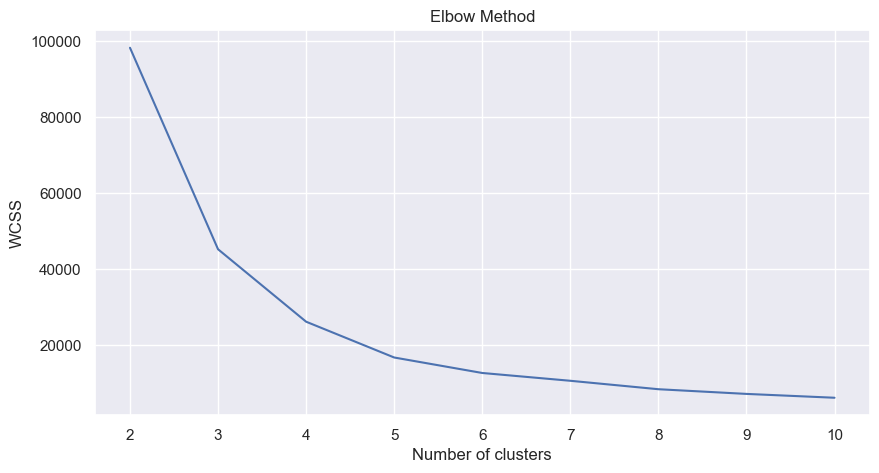

In [435]:
from sklearn.cluster import KMeans

wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init="auto",max_iter=300,random_state=0)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

* From the elbow method we can see that the optimal number of clusters is 4
* So we will use 4 clusters for our KMeans model

<Axes: xlabel='PCA1', ylabel='PCA2'>

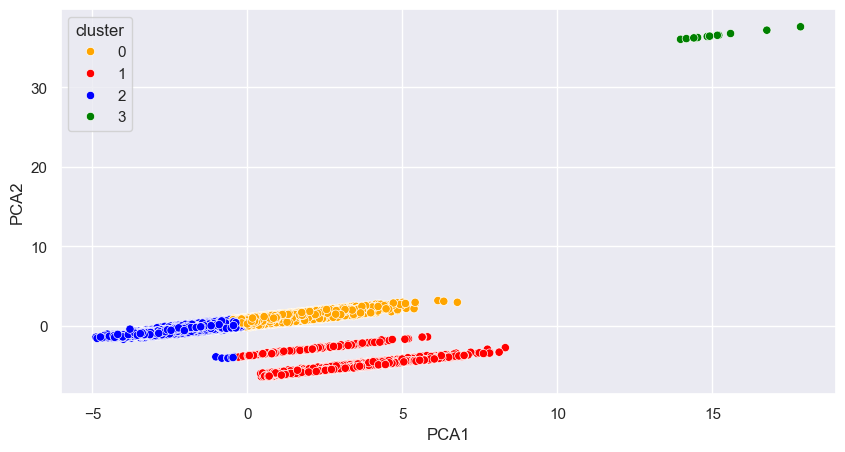

In [436]:
kmeans = KMeans(n_clusters=4,init='k-means++',n_init="auto",max_iter=300,random_state=0)
kmeans.fit(PCA_df)

PCA_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10,5))

sns.scatterplot(data=PCA_df,x='PCA1',y='PCA2',hue='cluster',palette=['orange','red','blue','green'])

* We can see that the clusters are not well seperated.

That's because we have a lot of features and we have reduced the dimensionality to 2.


## Feature Elemination
* Feature Elemination is a method that removes n number of features that are not important.
* We will use it to lower the dimensionality of our data.

* We will check the correlation values and set a threshold to dropping.

In [437]:
## Getting the most 10 correlated features with the target variable and dropping the rest

corr = df.corr()
corr_target = abs(corr['Rating'])

relevant_features = corr_target.sort_values(ascending=False)

relevant_features

Rating                          1.000000
Recommended IND                 0.792586
negative_sentiment              0.457402
positive_sentiment              0.430256
neutral_sentiment               0.277291
mean_word_length                0.071149
num_of_words                    0.063754
Positive Feedback Count         0.061005
Class Name_Jeans                0.033322
Age                             0.029914
Class Name_Dresses              0.024433
Department Name_Dresses         0.024433
Class Name_Trend                0.022357
Department Name_Trend           0.022357
Department Name_Intimate        0.022020
Division Name_Initmates         0.021411
Department Name_Tops            0.020712
Class Name_Lounge               0.018506
Class Name_Pants                0.017574
Class Name_Unknown              0.017538
Department Name_Unknown         0.017538
Division Name_Unknown           0.017538
Class Name_Knits                0.017220
Class Name_Jackets              0.016569
Department Name_

When we check the correlation table we see that the most of the correlation values are below 0.022.
So we will set our threshold to 0.022 and try to keep our good predictors.

By the way, we need use at least 10 features in the context of this project and our selected threshold covers this constraint too(14 features). 

In [438]:
relevant_features = corr_target.sort_values(ascending=False).loc[corr_target.sort_values(ascending=False)>0.022].index.to_list()

In [439]:
print(relevant_features)
print(len(relevant_features))

['Rating', 'Recommended IND', 'negative_sentiment', 'positive_sentiment', 'neutral_sentiment', 'mean_word_length', 'num_of_words', 'Positive Feedback Count', 'Class Name_Jeans', 'Age', 'Class Name_Dresses', 'Department Name_Dresses', 'Class Name_Trend', 'Department Name_Trend', 'Department Name_Intimate']
15


In [440]:
df_fe = df[relevant_features]

In [441]:
df_fe.head()

,Rating,Recommended IND,negative_sentiment,positive_sentiment,neutral_sentiment,mean_word_length,num_of_words,Positive Feedback Count,Class Name_Jeans,Age,Class Name_Dresses,Department Name_Dresses,Class Name_Trend,Department Name_Trend,Department Name_Intimate
0,-0.164561,0.470329,-0.737487,3.682099,-3.673954,3.890608,-1.894251,-0.454655,-0.226413,-0.834025,-0.610426,-0.610426,-0.072383,-0.072383,3.564351
1,0.731677,0.470329,-0.737487,0.632340,-0.380798,-1.065295,-0.037923,0.236652,-0.226413,-0.752900,1.638199,1.638199,-0.072383,-0.072383,-0.280556
2,-1.060800,-2.126171,-0.204076,-0.628020,0.761726,-0.230976,1.337134,-0.454655,-0.226413,1.356340,1.638199,1.638199,-0.072383,-0.072383,-0.280556
3,0.731677,0.470329,3.365681,1.480360,-2.976678,1.139356,-1.309852,-0.454655,-0.226413,0.545094,-0.610426,-0.610426,-0.072383,-0.072383,-0.280556
4,0.731677,0.470329,-0.737487,0.562320,-0.305190,0.744193,-0.862958,0.582306,-0.226413,0.301720,-0.610426,-0.610426,-0.072383,-0.072383,-0.280556


* Now we have selected our most important 14 features. Our dimension has been reduced from 36 to 14 

## Model Training